In [60]:
# Import required libraries

from datetime import datetime
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

In [61]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
hps_dc_df = pd.read_csv("/content/drive/MyDrive/EMSE 6577/Data/study-4/HPS Data_DC.csv",thousands=",")
hps_nyc_df = pd.read_csv("/content/drive/MyDrive/EMSE 6577/Data/study-4/HPS Data_NY.csv",thousands=",")

In [63]:
hps_dc_df = hps_dc_df[['Total', 'Concerned about possible side effects',
       'Don’t know if a vaccine will work', 'Don’t believe I need a vaccine',
       'Don’t like vaccines', 'Doctor has not recommended it',
       'Plan to wait and see if it is safe', 'Concerned about the cost',
       'Don’t trust COVID-19 vaccines', 'Don’t trust the government',
       'Don’t think COVID-19 is a big threat', 'Hard for me to get a vaccine',
       'Believe one dose is enough protection',
       'Experienced side effects from first dose']].astype(int)


In [64]:
hps_nyc_df = hps_nyc_df[['Total', 'Concerned about possible side effects',
       'Don’t know if a vaccine will work', 'Don’t believe I need a vaccine',
       'Don’t like vaccines', 'Doctor has not recommended it',
       'Plan to wait and see if it is safe', 'Concerned about the cost',
       'Don’t trust COVID-19 vaccines', 'Don’t trust the government',
       'Don’t think COVID-19 is a big threat', 'Hard for me to get a vaccine',
       'Believe one dose is enough protection',
       'Experienced side effects from first dose']].astype(int)

In [21]:
# https://mpdc.dc.gov/node/208852
# 6311 arrests May 24 - September 30th in DC
# Estimated population of DC, 2021: 670050

# https://www.census.gov/quickfacts/newyorkcitynewyork
# 56767 arrests May 24 - September 30th in NYC
# Estimated population of NYC, 2021: 8467513

In [11]:
# Arrests/capita in DC - treatment group

6311/670050

0.009418700097007685

In [12]:
# Arrests/capita in NYC - control group
56767/8467513

0.006704093634104843

In [65]:
hps_dc_df.columns

Index(['Total', 'Concerned about possible side effects',
       'Don’t know if a vaccine will work', 'Don’t believe I need a vaccine',
       'Don’t like vaccines', 'Doctor has not recommended it',
       'Plan to wait and see if it is safe', 'Concerned about the cost',
       'Don’t trust COVID-19 vaccines', 'Don’t trust the government',
       'Don’t think COVID-19 is a big threat', 'Hard for me to get a vaccine',
       'Believe one dose is enough protection',
       'Experienced side effects from first dose'],
      dtype='object')

In [66]:
hps_dc_df.loc[:,"group"] = 1
hps_nyc_df.loc[:,"group"] = 0

(array([4., 2., 9., 2., 4., 1., 0., 0., 1., 1.]),
 array([0.07544233, 0.12548932, 0.1755363 , 0.22558328, 0.27563027,
        0.32567725, 0.37572424, 0.42577122, 0.4758182 , 0.52586519,
        0.57591217]),
 <a list of 10 Patch objects>)

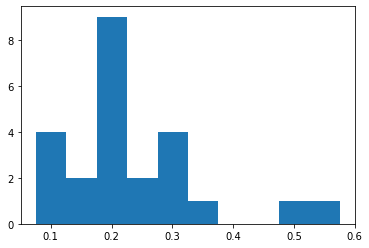

In [72]:
plt.hist(hps_dc_df['Don’t trust the government']/hps_dc_df['Total'])

In [58]:
display(hps_dc_df)

,Total,Concerned about possible side effects,Don’t know if a vaccine will work,Don’t believe I need a vaccine,Don’t like vaccines,Doctor has not recommended it,Plan to wait and see if it is safe,Concerned about the cost,Don’t trust COVID-19 vaccines,Don’t trust the government,Don’t think COVID-19 is a big threat,Hard for me to get a vaccine,Believe one dose is enough protection,Experienced side effects from first dose
0,118895,66140,29579,13154,4022,7972,72242,4337,28331,28040,0,0,0,0
1,102805,57123,28144,10279,5843,10915,60642,7050,22908,21366,0,0,0,0
2,111630,63848,38193,3559,5684,22218,61939,1014,33300,21145,0,0,0,0
3,89366,53250,9916,2171,6994,4239,48401,7550,17111,19711,0,0,0,0
4,75717,30211,14432,8503,2338,6604,21855,1328,14892,10586,0,0,0,0
5,60775,42594,9147,11573,11937,3709,22526,1726,21623,18259,0,0,0,0
6,55897,29539,8334,3138,2258,0,35312,0,13211,4217,0,0,0,0
7,52027,24368,11167,3246,757,5937,31893,0,19543,9699,0,0,0,0
8,42714,19965,11079,6135,5222,2114,18789,3383,17706,7844,0,0,0,0
9,55587,22530,12268,5363,7710,5175,21620,0,22536,12159,0,0,0,0


In [59]:
hps_nyc_df

,Total,Concerned about possible side effects,Don’t know if a vaccine will work,Don’t believe I need a vaccine,Don’t like vaccines,Doctor has not recommended it,Plan to wait and see if it is safe,Concerned about the cost,Don’t trust COVID-19 vaccines,Don’t trust the government,Don’t think COVID-19 is a big threat,Hard for me to get a vaccine,Believe one dose is enough protection,Experienced side effects from first dose
0,1315729,656263,320711,140841,94759,165443,675199,125601,134611,95857,0,0,0,0
1,1361190,761982,239303,103717,36215,175289,886810,55795,156715,93533,0,0,0,0
2,937368,440421,215304,31658,33244,22021,480572,18857,69783,84190,0,0,0,0
3,1082552,463154,157366,66216,57077,56981,614668,16600,217205,340519,0,0,0,0
4,616858,414376,170808,7531,41094,69119,319807,12012,76534,34007,0,0,0,0
5,649683,321037,97595,2865,53013,19779,401131,0,164384,49779,0,0,0,0
6,649984,429012,165368,89008,59959,99453,240222,20702,199956,114376,0,0,0,0
7,688309,147925,78813,50833,150222,11214,353105,0,50872,66034,0,0,0,0
8,541298,132049,15139,38389,9758,27597,167520,0,264249,31411,0,0,0,0
9,409762,83401,68350,71070,73939,0,118762,0,86533,130521,0,0,0,0


In [ ]:
hps_dc_df["safety_efficacy"] = hps_dc_df["Concerned about possible side effects"	"Don’t know if a vaccine will work","Plan to wait and see if it is safe",""]